In [1]:
from functions import parse_time_data, save_time_data_info_file, show_heatmap, show_3D_plot, show_bar_chart, show_box_plot

In [2]:
# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results_back/result_summary.csv"
time_data = parse_time_data(summary_result_path)

In [3]:
save_file_path = "../../exp_results_back/time_consumption_summary.csv"
save_time_data_info_file(time_data, save_file_path)

In [4]:
# time_data의 'proposed_timeConsumption(us)'의 최대값과 최소값이 있는 row를 찾아서 출력
print(time_data.loc[time_data['proposed_timeConsumption(us)'].idxmax()])
print(time_data.loc[time_data['proposed_timeConsumption(us)'].idxmin()])

numTasks                         1.200000e+01
utilization                      2.000000e-01
simulator_timeConsumption(us)    5.672298e+08
proposed_timeConsumption(us)     4.421000e+02
Name: 0, dtype: float64
numTasks                         1.200000e+01
utilization                      6.000000e-01
simulator_timeConsumption(us)    2.254431e+08
proposed_timeConsumption(us)     4.403333e+02
Name: 2, dtype: float64


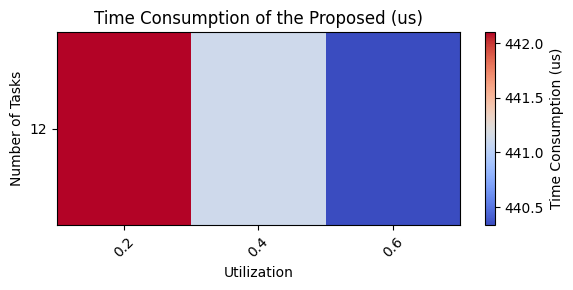

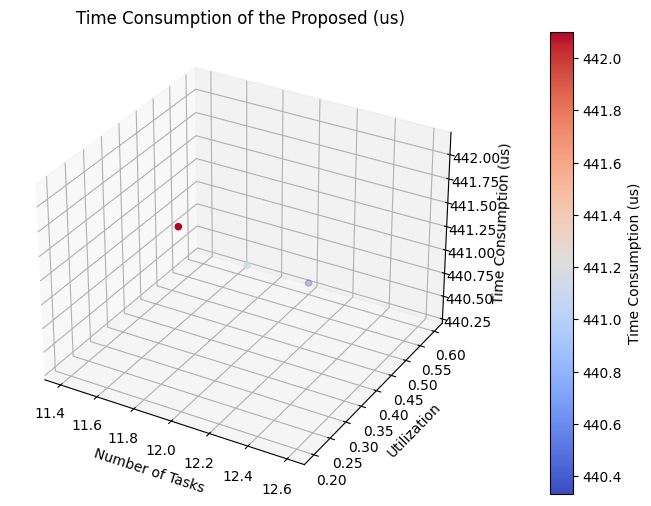

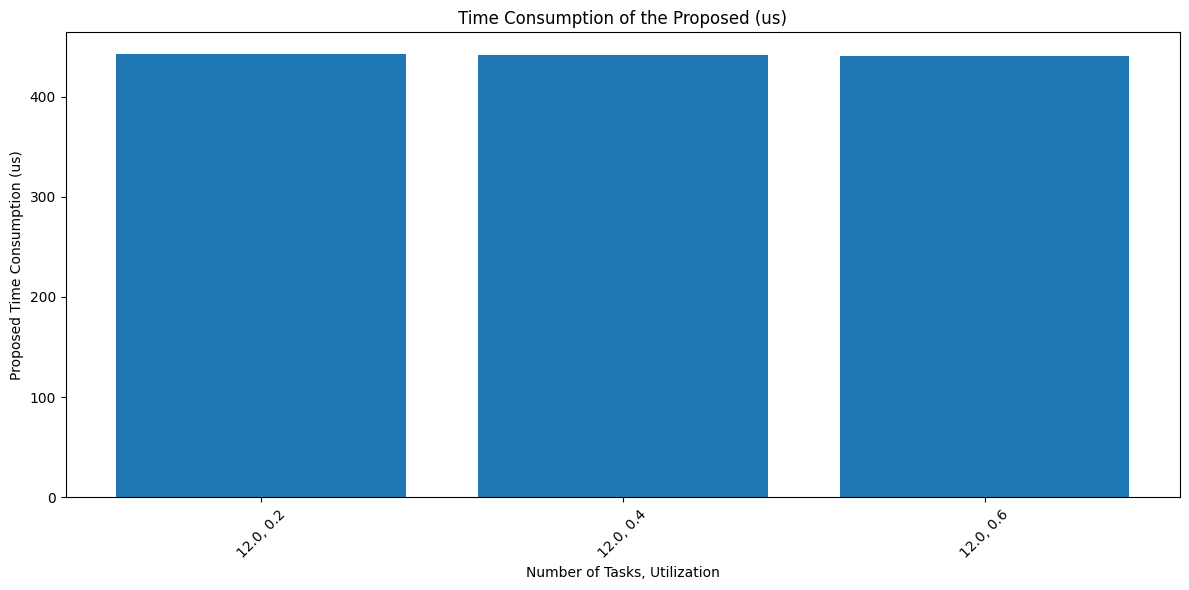

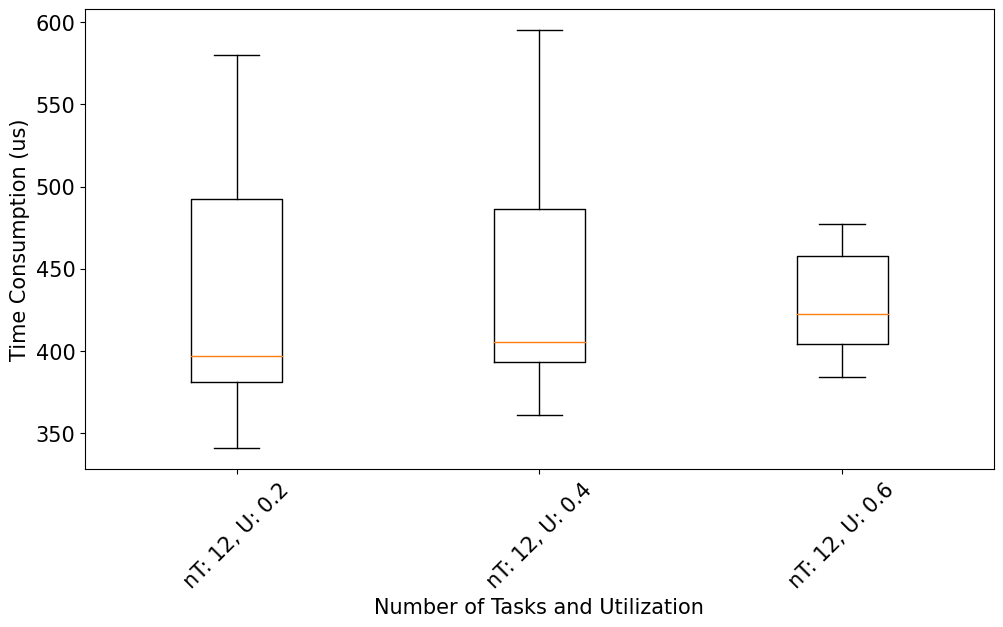

In [5]:
# visualize the time consumption of the proposed algorithm
values = "proposed_timeConsumption(us)"
title = 'Time Consumption of the Proposed (us)'
show_heatmap(time_data, values, title)
show_3D_plot(time_data, time_data[values], title)
show_bar_chart(time_data, values, title)
show_box_plot(summary_result_path, values, title, 15)

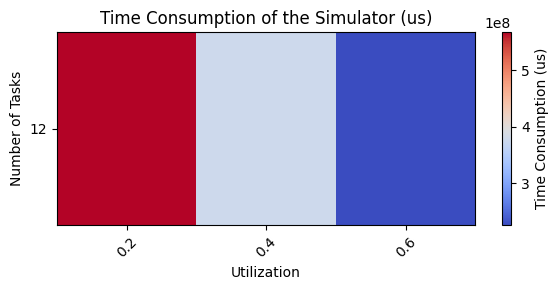

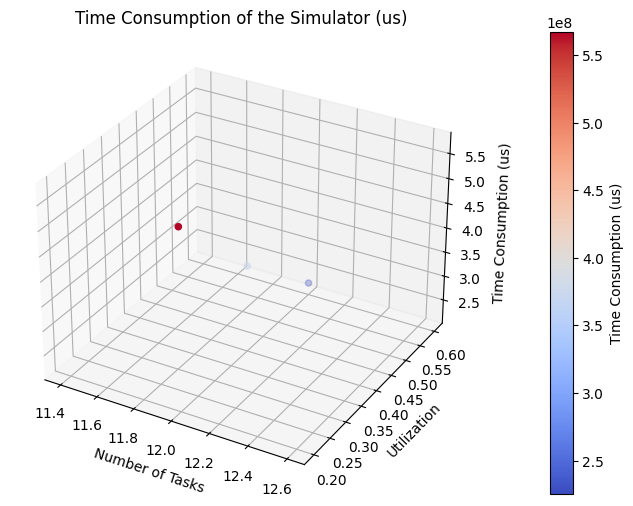

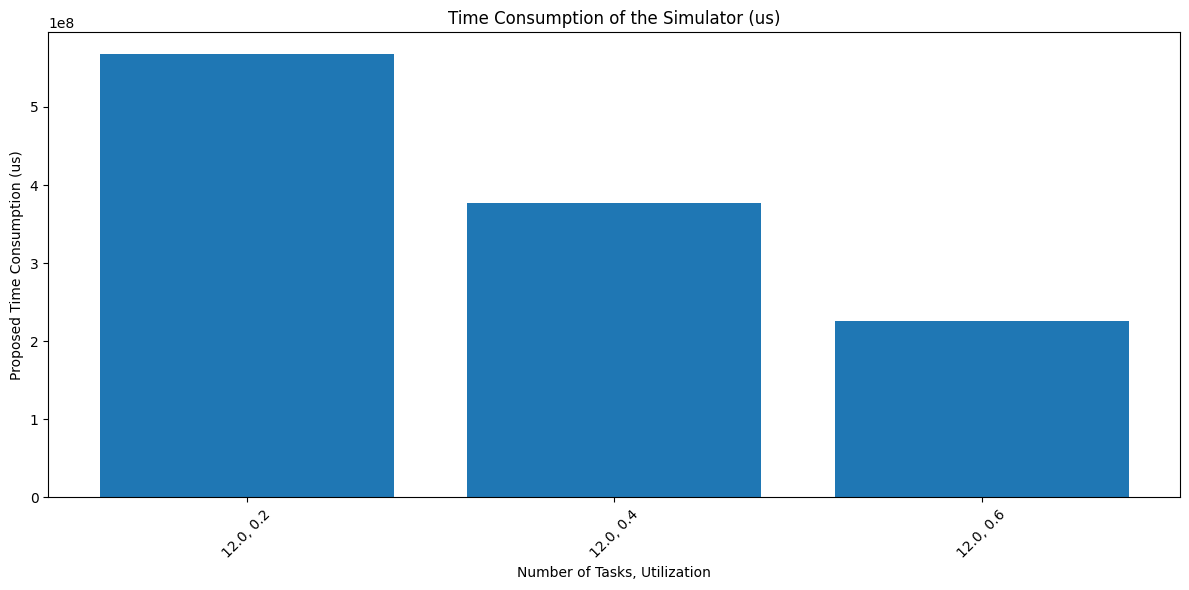

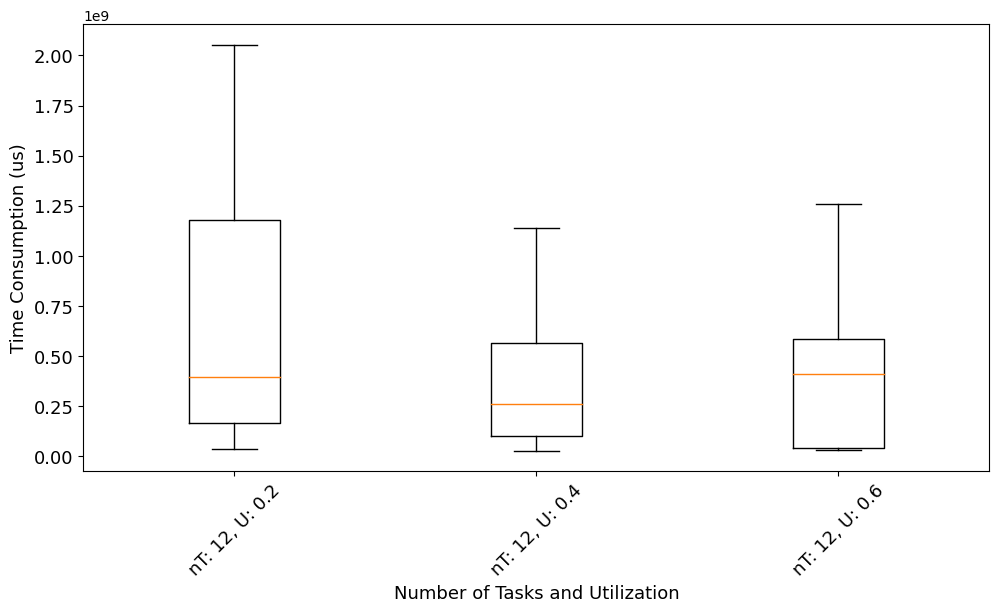

In [6]:
# visualize the time consumption of the simulator
values = 'simulator_timeConsumption(us)'
title = 'Time Consumption of the Simulator (us)'
show_heatmap(time_data, values, title)
show_3D_plot(time_data, time_data[values], title)
show_bar_chart(time_data, values, title)
show_box_plot(summary_result_path, values, title, 13)

In [7]:
# 실제 CFS를 통해 계산한 시간과 시뮬레이터를 통해 계산한 시간의 차이를 계산

import re

# read text from file
log_path = "../../merong.txt"
with open(log_path, 'r') as f:
    log_data = f.read()

# Extracting the simulated times and time consumption values
simulated_times = [int(x) for x in re.findall(r"Simulated Time \(ms\): (\d+)", log_data)]
time_consumptions = [int(x) for x in re.findall(r"Time consumption \(CFS simulator\): (\d+) us", log_data)]

# Calculating the averages
average_simulated_time = sum(simulated_times) / len(simulated_times)
average_time_consumption = (sum(time_consumptions) / len(time_consumptions))/1000

print(average_simulated_time, average_time_consumption)

120804.0 200.91436


In [8]:
average_simulated_time = (average_simulated_time * 120000) / (1000*60)
print(average_simulated_time)

241608.0
